## Logistic Regression 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import dot

#use 'inline' for plotting the figure inside the notebook, and 'qt' for pop-up plot
%matplotlib inline

### Declare Variables 

In [2]:
nb_var_in = 2 #Dimension of input vector
nb_var_out = 1 #Dimension of output vector
nb_data = 20  #Number of datapoints
nb_iter = 10 #Number of iterations for IRLS

### Generate Data 

In [3]:
#example from https://en.wikipedia.org/wiki/Logistic_regression)
#Time passed studying for an exam (explanatory variables)
x = np.array([0.5,0.75,1.,1.25,1.5,1.75,1.75,2.,2.25,2.5,2.75,3.,3.25,3.5,4.,4.25,4.5,4.75,5.,5.5])
X = np.vstack([np.ones(nb_data),x]).T
#Failed/passed exam (binary response variables)
Y = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])[:,None]

#### Iteratively Reweighted Least Squares (IRLS) 

In [4]:
a = np.zeros((nb_var_in,1))
for i in range(nb_iter):
    mu = 1./(1 + np.exp(-dot(X,a)))
    W = np.diag((mu * (1-mu)).flatten())
    a = dot(inv(dot(X.T,dot(W,X))),dot(X.T, dot(W,dot(X,a))+Y-mu))    

### Prediction

In [5]:
x0 = np.linspace(0,6,100)
X0 = np.vstack([np.ones(100),x0]).T
p = 1./(1+np.exp(-dot(X0,a)))

### Plot Results 

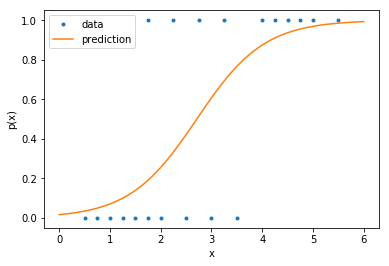

In [6]:
plt.plot(X[:,1],Y,'.', label='data')
plt.plot(X0[:,1],p, label='prediction')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend(loc='best')